# Objective
To perform the RFM analysis of the online retail store, based on [this]('data/online_retail_II.xlsx') dataset.

## Background
What is RFM analysis (recency, frequency, monetary)? RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

# EDA

## Importing libraries

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Configuring the pandas library

In [121]:
pd.set_option('display.max_columns', 999)
pd.options.display.float_format = '{:20.2f}'.format

## Reading the excel file

In [122]:
df = pd.read_excel('../data/online_retail_II.xlsx', sheet_name=0)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


## Gathering the meta data about the dataset

In [123]:
df.shape

(525461, 8)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [125]:
df.select_dtypes(include='object')

,Invoice,StockCode,Description,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,United Kingdom
...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,United Kingdom


In [126]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [127]:
df.describe(include=object)

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [128]:
df[(df['Customer ID'].isna()) & (df['Quantity'] < 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524458,538092,37467,NaN,-177,2010-12-09 14:49:00,0.00,NaN,United Kingdom
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [129]:
df[df['Quantity'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [130]:
df[['Invoice']].isnull().sum()

Invoice    0
dtype: int64

In [131]:
df = df.astype({
    'Invoice':'string',
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  string        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), string(1)
memory usage: 32.1+ MB


In [132]:
alphabets = df['Invoice'].str.replace("[0-9]", "", regex=True).unique().tolist()
alphabets_tuple = tuple([alphabets[1], alphabets[2]])
df.query('Invoice.str.startswith(@alphabets_tuple)')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [133]:
df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.00,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [134]:
df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]\
    .describe()

,Quantity,InvoiceDate,Price,Customer ID
count,3098.00,3098,3098.00,1817.00
mean,0.16,2010-06-20 19:44:09.935442176,219.27,14076.40
min,-4999.00,2009-12-01 09:28:00,-53594.36,12346.00
25%,1.00,2010-03-21 13:15:00,13.23,12621.00
50%,1.00,2010-06-24 11:32:30,23.45,13360.00
75%,2.00,2010-09-30 18:41:45,117.53,15031.00
max,1000.00,2010-12-09 16:35:00,25111.09,18287.00
std,93.92,NaN,1889.99,1743.22


In [135]:
df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]\
    .describe(include=object)

,StockCode,Description,Country
count,3098,3050,3098
unique,55,42,29
top,POST,POSTAGE,United Kingdom
freq,865,862,2075


In [136]:
df[
    (df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)
]['StockCode'].value_counts()

StockCode
POST            865
M               850
DOT             736
C2              138
D               100
ADJUST           67
BANK CHARGES     65
S                41
DCGS0058         31
gift_0001_30     21
gift_0001_20     19
TEST001          15
PADS             15
DCGS0076         13
DCGSSBOY         12
DCGSSGIRL        12
AMAZONFEE         9
DCGS0003          9
gift_0001_10      7
gift_0001_40      4
DCGS0004          4
DCGS0069          4
m                 4
gift_0001_80      4
DCGS0066N         4
gift_0001_50      4
ADJUST2           3
DCGS0072          3
B                 3
SP1002            3
gift_0001_70      3
DCGS0068          2
DCGS0037          2
DCGS0062          2
TEST002           2
gift_0001_60      2
gift_0001_90      2
DCGS0056          1
GIFT              1
DCGS0044          1
C3                1
47503J            1
DCGS0041          1
DCGS0075          1
DCGS0070          1
DCGS0006          1
DCGS0016          1
DCGSLGIRL         1
DCGS0027          1
DCGS0036  

In [137]:
df[df['StockCode'].str.match("^\\d{5}[a-zA-Z]*$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.00,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [138]:
df[df['StockCode'].str.match("^([a-zA-Z]+)$") == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.00,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [139]:
df[(df['StockCode'].str.match('^([a-zA-Z]+)') == True) & (df['Invoice'].str.startswith('C', 'A'))]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.00,United Kingdom
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.00,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.00,United Kingdom
3451,C489685,POST,POSTAGE,-1,2009-12-02 10:28:00,18.00,12523.00,France
...,...,...,...,...,...,...,...,...
519251,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
519295,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom
522330,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.00,United Kingdom


In [140]:
df[(df['StockCode'].str.match('^([a-zA-Z]+)') == True) & (df['Invoice'].str.startswith(alphabets_tuple))]\
    .groupby(by='StockCode')[['Invoice', 'InvoiceDate', 'Quantity', 'Customer ID']].count()

,Invoice,InvoiceDate,Quantity,Customer ID
StockCode,,,,
ADJUST,31,31,31,29
AMAZONFEE,7,7,7,0
B,3,3,3,0
BANK CHARGES,42,42,42,6
C2,5,5,5,5
D,95,95,95,92
DOT,2,2,2,0
M,294,294,294,224
PADS,1,1,1,1


In [141]:
df[df['StockCode'].str.match('^([a-zA-Z]+)') == True]\
    .groupby(by='StockCode')[['Invoice', 'InvoiceDate', 'Quantity', 'Customer ID']]\
        .count()

,Invoice,InvoiceDate,Quantity,Customer ID
StockCode,,,,
ADJUST,67,67,67,61
ADJUST2,3,3,3,3
AMAZONFEE,9,9,9,0
B,3,3,3,0
BANK CHARGES,65,65,65,26
C2,138,138,138,125
C3,1,1,1,0
D,100,100,100,97
DCGS0003,9,9,9,0


In [142]:
alphabetic_stock_code_df = df[df['StockCode'].str.match('^([a-zA-Z]+)') == True]\
    .groupby(by='StockCode')[['Invoice', 'Quantity', 'Customer ID']]\
        .count()
alphabetic_stock_code_df.reset_index(inplace=True)
alphabetic_stock_code_df\
    .rename(
        columns={'Invoice': 'Invoices','Quantity': 'Stock Quantity','Customer ID': 'Stock Customers'},
        inplace=True
    )
alphabetic_stock_code_df

,StockCode,Invoices,Stock Quantity,Stock Customers
0,ADJUST,67,67,61
1,ADJUST2,3,3,3
2,AMAZONFEE,9,9,0
3,B,3,3,0
4,BANK CHARGES,65,65,26
5,C2,138,138,125
6,C3,1,1,0
7,D,100,100,97
8,DCGS0003,9,9,0
9,DCGS0004,4,4,0


In [143]:
alphabetic_stock_code_df[['Stock Quantity']].value_counts(normalize=True).to_frame()

,proportion
Stock Quantity,
1,0.31
4,0.13
2,0.11
3,0.09
9,0.04
12,0.04
15,0.04
65,0.02
850,0.02


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  string        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), string(1)
memory usage: 32.1+ MB


In [145]:
alphabetic_stock_code_df.all()

StockCode           True
Invoices            True
Stock Quantity      True
Stock Customers    False
dtype: bool

In [146]:
cleaned_df = df.copy()
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [147]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  string        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), string(1)
memory usage: 32.1+ MB


In [148]:
cleaned_df = cleaned_df.astype({
    'StockCode': 'string',
    'Description': 'string',
    'Country': 'string'
})
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  string        
 1   StockCode    525461 non-null  string        
 2   Description  522533 non-null  string        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 32.1 MB


# Data Cleaning

In [149]:
mask = (
    cleaned_df['Invoice'].str.match("^\\d{6}$") == True
)
cleaned_df[mask]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [150]:
mask = (
    (cleaned_df['Invoice'].str.match("^\\d{5}$") == True) |
    (cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == True) |
    (cleaned_df['StockCode'].str.match("^PADS$") == True)
)
cleaned_df[mask]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


In [151]:
cleaned_df['StockCode'].str.replace("[0-9]", "", regex=True).unique().tolist()

['',
 'P',
 'W',
 'C',
 'B',
 'F',
 'L',
 'S',
 'A',
 'N',
 'POST',
 'E',
 'J',
 'D',
 'G',
 'LP',
 'BL',
 'K',
 'H',
 'GR',
 'M',
 'DCGS',
 'DOT',
 'U',
 'b',
 'w',
 'c',
 'a',
 'f',
 'bl',
 's',
 'p',
 'R',
 'V',
 'T',
 'I',
 'BANK CHARGES',
 'O',
 'Z',
 'TEST',
 'gift__',
 'DCGSN',
 'm',
 'PADS',
 'Y',
 'HC',
 'e',
 'd',
 'ADJUST',
 'DCGSSGIRL',
 'GIFT',
 'DCGSLBOY',
 'k',
 'g',
 'DCGSSBOY',
 'DCGSLGIRL',
 'j',
 'l',
 'n',
 'J ',
 'SP',
 'AMAZONFEE']

In [152]:
cleaned_df[(cleaned_df['StockCode'].str.match("^\\APA") == True)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.00,15182.00,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.00,13765.00,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.00,14459.00,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.00,14857.00,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.00,12671.00,Germany


In [153]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [154]:
cleaned_df.describe(include='string')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


## Dropping null customers purchases

In [155]:
cleaned_df.dropna(subset='Customer ID', inplace=True)
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [156]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,417534.00,417534,417534.00,417534.00
mean,12.76,2010-07-01 01:12:19.787609856,3.89,15360.65
min,-9360.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 11:26:00,1.25,13983.00
50%,4.00,2010-07-08 19:12:00,1.95,15311.00
75%,12.00,2010-10-14 14:08:00,3.75,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,101.22,NaN,71.13,1680.81


In [157]:
cleaned_df[cleaned_df['Quantity'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [158]:
cleaned_df[cleaned_df['Quantity'] < 0].describe()

,Quantity,InvoiceDate,Price,Customer ID
count,9839.00,9839,9839.00,9839.00
mean,-21.55,2010-06-15 13:45:38.534404096,28.47,15035.01
min,-9360.00,2009-12-01 10:33:00,0.01,12346.00
25%,-6.00,2010-03-12 13:11:30,1.62,13576.00
50%,-2.00,2010-06-14 13:32:00,2.95,14911.00
75%,-1.00,2010-10-01 13:28:00,6.75,16454.00
max,-1.00,2010-12-09 17:32:00,25111.09,18287.00
std,212.08,NaN,405.04,1690.63


In [160]:
cleaned_df[['Quantity']].describe()

,Quantity
count,417534.00
mean,12.76
std,101.22
min,-9360.00
25%,2.00
50%,4.00
75%,12.00
max,19152.00


In [161]:
cleaned_df[cleaned_df['Quantity'] >= 0].describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407695.00,407695,407695.00,407695.00
mean,13.59,2010-07-01 10:10:10.782177792,3.29,15368.50
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,13997.00
50%,5.00,2010-07-09 15:46:00,1.95,15321.00
75%,12.00,2010-10-14 17:09:00,3.75,16812.00
max,19152.00,2010-12-09 20:01:00,10953.50,18287.00
std,96.84,NaN,34.76,1679.80


In [162]:
cleaned_df[cleaned_df['Quantity'] < 0].describe()

,Quantity,InvoiceDate,Price,Customer ID
count,9839.00,9839,9839.00,9839.00
mean,-21.55,2010-06-15 13:45:38.534404096,28.47,15035.01
min,-9360.00,2009-12-01 10:33:00,0.01,12346.00
25%,-6.00,2010-03-12 13:11:30,1.62,13576.00
50%,-2.00,2010-06-14 13:32:00,2.95,14911.00
75%,-1.00,2010-10-01 13:28:00,6.75,16454.00
max,-1.00,2010-12-09 17:32:00,25111.09,18287.00
std,212.08,NaN,405.04,1690.63


In [163]:
cleaned_df['Quantity'].median()

4.0

## Outliers removal methodology testing

### Getting non-outlier rows only

In [165]:
cols = ['Quantity', 'Price', 'Customer ID']

for col in cols:
    q1 = cleaned_df[col].quantile(0.25)
    q3 = cleaned_df[col].quantile(0.75)
    IQR = q3 - q1
    col_outliers_mask = (cleaned_df[col] >= (q1 - 1.5 * IQR)) & (cleaned_df[col] <= (q3 + 1.5 * IQR))
    non_outliers_df = cleaned_df[col_outliers_mask]

non_outliers_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [166]:
non_outliers_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,417534.00,417534,417534.00,417534.00
mean,12.76,2010-07-01 01:12:19.787609856,3.89,15360.65
min,-9360.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 11:26:00,1.25,13983.00
50%,4.00,2010-07-08 19:12:00,1.95,15311.00
75%,12.00,2010-10-14 14:08:00,3.75,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,101.22,NaN,71.13,1680.81


### OR

### Getting outliers removed dataframe

In [167]:
cols = ['Quantity', 'Price', 'Customer ID']
outliers_mask = pd.Series([False] * len(cleaned_df))  # Initialize an empty mask

for col in cols:
    q1 = cleaned_df[col].quantile(0.25)
    q3 = cleaned_df[col].quantile(0.75)
    IQR = q3 - q1
    col_outliers_mask = (cleaned_df[col] < (q1 - 1.5 * IQR)) | (cleaned_df[col] > (q3 + 1.5 * IQR))
    outliers_mask = outliers_mask | col_outliers_mask  # Accumulate the outliers across columns

# Extract the rows with outliers
outliers_cleaned_df = cleaned_df[outliers_mask]
outliers_cleaned_df

/var/folders/76/0nhsp7cs0r551sp4nmc7sh_00000gn/T/ipykernel_741/1716191813.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers_cleaned_df = cleaned_df[outliers_mask]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
22,489436,22194,BLACK DINER WALL CLOCK,2,2009-12-01 09:06:00,8.50,13078.00,United Kingdom
35,489437,21360,JOY LARGE WOOD LETTERS,1,2009-12-01 09:08:00,9.95,15362.00,United Kingdom
38,489437,35400,WOODEN BOX ADVENT CALENDAR,2,2009-12-01 09:08:00,8.95,15362.00,United Kingdom
54,489438,21329,DINOSAURS WRITING SET,28,2009-12-01 09:24:00,0.98,18102.00,United Kingdom
...,...,...,...,...,...,...,...,...
525289,538166,22194,BLACK DINER WALL CLOCK,1,2010-12-09 18:09:00,8.50,17965.00,United Kingdom
525290,538166,22193,RED DINER WALL CLOCK,2,2010-12-09 18:09:00,8.50,17965.00,United Kingdom
525323,538167,20748,KENSINGTON COFFEE SET,1,2010-12-09 18:58:00,12.75,14713.00,United Kingdom
525366,538169,21527,RED RETROSPOT TRADITIONAL TEAPOT,2,2010-12-09 19:28:00,7.95,13230.00,United Kingdom


In [168]:
outliers_cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,57804.00,57804,57804.00,57804.00
mean,43.17,2010-06-21 12:01:45.505501440,13.41,15189.58
min,-7128.00,2009-12-01 07:45:00,0.00,12346.00
25%,1.00,2010-03-26 12:19:00,1.45,13798.00
50%,3.00,2010-06-25 11:39:00,7.95,14953.00
75%,48.00,2010-09-29 11:49:15,9.95,16684.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,257.19,NaN,190.86,1679.89


In [169]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  string        
 1   StockCode    417534 non-null  string        
 2   Description  417534 non-null  string        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 28.7 MB


In [170]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,417534.00,417534,417534.00,417534.00
mean,12.76,2010-07-01 01:12:19.787609856,3.89,15360.65
min,-9360.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 11:26:00,1.25,13983.00
50%,4.00,2010-07-08 19:12:00,1.95,15311.00
75%,12.00,2010-10-14 14:08:00,3.75,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,101.22,NaN,71.13,1680.81


## Removing negative values from `Quantity`

In [171]:
cleaned_df['Quantity'] = cleaned_df['Quantity'].apply(lambda x : x if x > 0 else cleaned_df['Quantity'].median())
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  string        
 1   StockCode    417534 non-null  string        
 2   Description  417534 non-null  string        
 3   Quantity     417534 non-null  float64       
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  string        
dtypes: datetime64[ns](1), float64(3), string(4)
memory usage: 28.7 MB


In [172]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,417534.00,417534,417534.00,417534.00
mean,13.36,2010-07-01 01:12:19.787609856,3.89,15360.65
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 11:26:00,1.25,13983.00
50%,4.00,2010-07-08 19:12:00,1.95,15311.00
75%,12.00,2010-10-14 14:08:00,3.75,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,95.71,NaN,71.13,1680.81


In [173]:
cleaned_df[['Customer ID']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Customer ID  417534 non-null  float64
dtypes: float64(1)
memory usage: 6.4 MB


## Removing 0 `Price` rows

In [174]:
cleaned_df = cleaned_df[(cleaned_df['Price'] > 0) & (cleaned_df['Price'] > 0.001)]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.00,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.00,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.00,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.00,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.00,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2.00,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1.00,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1.00,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2.00,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [175]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,417489.00,417489,417489.00,417489.00
mean,13.36,2010-07-01 01:20:44.530083584,3.89,15360.76
min,1.00,2009-12-01 07:45:00,0.01,12346.00
25%,2.00,2010-03-26 11:26:00,1.25,13983.00
50%,4.00,2010-07-08 19:12:00,1.95,15311.00
75%,12.00,2010-10-14 14:08:00,3.75,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,95.71,NaN,71.14,1680.78


In [176]:
cleaned_df['Price'].min()

0.01

## Data loss percentage after data cleaning

In [177]:
(len(cleaned_df)/len(df)) * 100

79.45194790859836

# Feature Engineering 

In [178]:
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']
cleaned_df

/var/folders/76/0nhsp7cs0r551sp4nmc7sh_00000gn/T/ipykernel_741/3309217499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.00,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12.00,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12.00,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.00,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.00,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2.00,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1.00,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1.00,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2.00,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [179]:
agg_df = cleaned_df.groupby(by='Customer ID', as_index=False) \
    .agg(
        MonetaryValue = ('SalesLineTotal', "sum"),
        Frequency = ('Invoice', 'nunique'),
        LastInvoiceDate = ('InvoiceDate', "max")
    )
agg_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,1860.86,15,2010-10-04 16:33:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,222.16,1,2010-09-27 14:59:00
3,12349.00,2767.74,4,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00
...,...,...,...,...
4376,18283.00,641.77,6,2010-11-22 15:30:00
4377,18284.00,561.68,2,2010-10-06 12:31:00
4378,18285.00,427.00,1,2010-02-17 10:24:00
4379,18286.00,1377.43,3,2010-08-20 11:57:00


In [181]:
max_last_invoice_date = agg_df['LastInvoiceDate'].max()
max_last_invoice_date

Timestamp('2010-12-09 20:01:00')

In [182]:
recency_minutes = ((max_last_invoice_date - agg_df['LastInvoiceDate']).dt.seconds)/60
recency_hours = recency_minutes / 60
recency_hours

0                      3.47
1                      5.07
2                      5.03
3                     11.63
4                      4.63
               ...         
4376                   4.52
4377                   7.50
4378                   9.62
4379                   8.07
4380                   8.17
Name: LastInvoiceDate, Length: 4381, dtype: float64

In [183]:
agg_df['Recency_hrs'] = recency_hours
agg_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs
0,12346.00,1860.86,15,2010-10-04 16:33:00,3.47
1,12347.00,1323.32,2,2010-12-07 14:57:00,5.07
2,12348.00,222.16,1,2010-09-27 14:59:00,5.03
3,12349.00,2767.74,4,2010-10-28 08:23:00,11.63
4,12351.00,300.93,1,2010-11-29 15:23:00,4.63
...,...,...,...,...,...
4376,18283.00,641.77,6,2010-11-22 15:30:00,4.52
4377,18284.00,561.68,2,2010-10-06 12:31:00,7.50
4378,18285.00,427.00,1,2010-02-17 10:24:00,9.62
4379,18286.00,1377.43,3,2010-08-20 11:57:00,8.07


### Distribution of `Recency, Frequency` & `MonetaryValue`

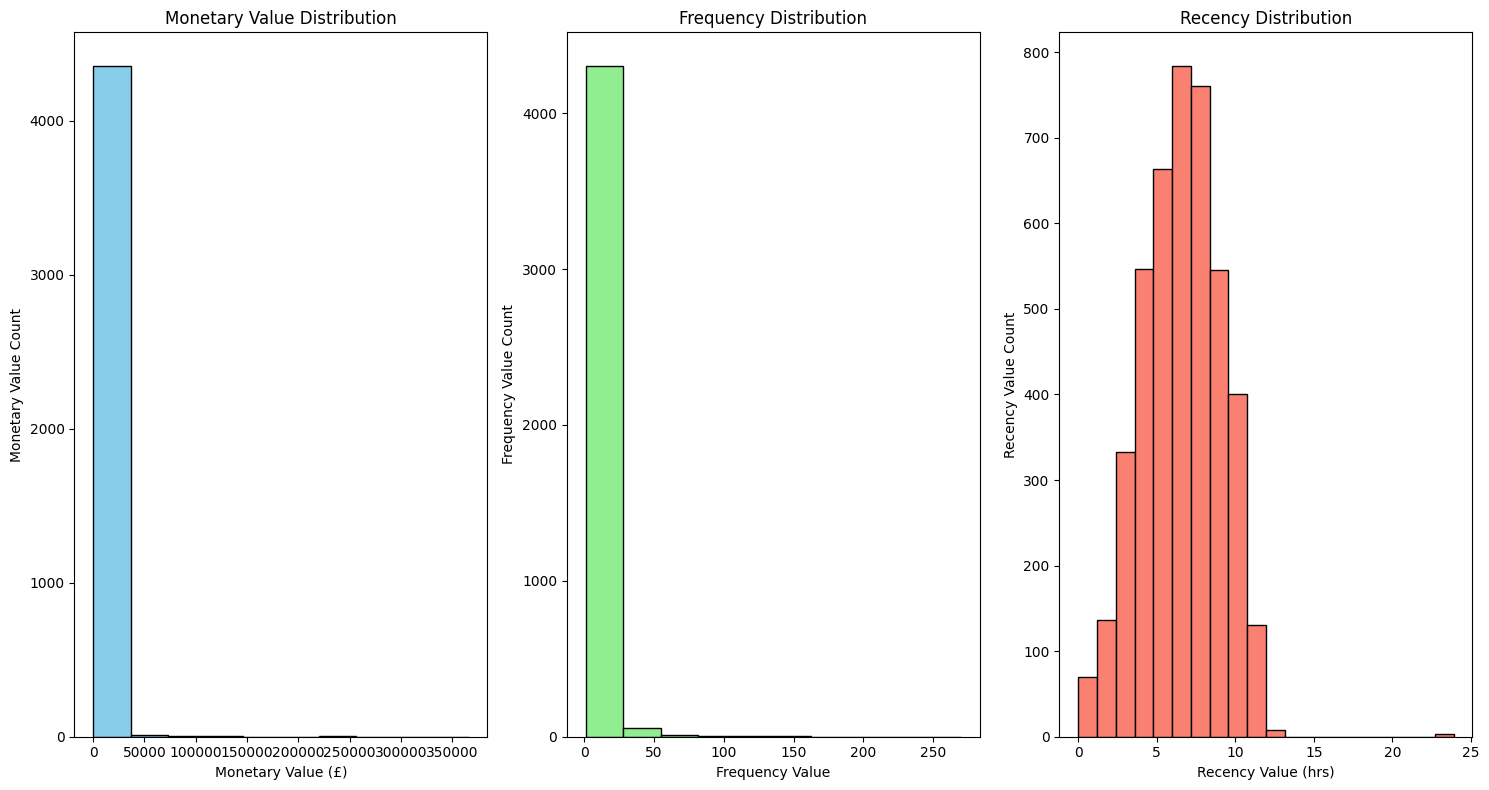

In [184]:
plt.figure(figsize=(15, 8))

plt.subplot(1,3,1)
plt.hist(agg_df['MonetaryValue'],bins=10, color='skyblue', edgecolor='black')
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value (£)")
plt.ylabel("Monetary Value Count")

plt.subplot(1,3,2)
plt.hist(agg_df['Frequency'],bins=10, color='lightgreen', edgecolor='black')
plt.title("Frequency Distribution")
plt.xlabel("Frequency Value")
plt.ylabel("Frequency Value Count")

plt.subplot(1,3,3)
plt.hist(agg_df['Recency_hrs'],bins=20, color='salmon', edgecolor='black')
plt.title("Recency Distribution")
plt.xlabel("Recency Value (hrs)")
plt.ylabel("Recency Value Count")

plt.tight_layout()
plt.show()

In [185]:
agg_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs
count,4381.00,4381.00,4381.00,4381,4381.00
mean,15351.02,2271.77,5.38,2010-09-10 06:15:13.120292096,6.58
min,12346.00,2.95,1.00,2009-12-01 09:55:00,0.00
25%,13880.00,310.43,1.00,2010-07-25 15:43:00,4.78
50%,15356.00,728.48,3.00,2010-10-19 13:20:00,6.65
75%,16838.00,1812.71,6.00,2010-11-23 09:16:00,8.35
max,18287.00,366039.27,270.00,2010-12-09 20:01:00,23.90
std,1701.00,10103.36,10.05,NaN,2.48


#### Poisson distribution check

In [186]:
agg_df['Recency_hrs'].std()

2.4840425926274996

In [187]:
from math import sqrt

sqrt(agg_df['Recency_hrs'].mean())

2.564297565437492

## RFM outliers visualization

***Conclusion***: `Recency` is not a poisson distribution.

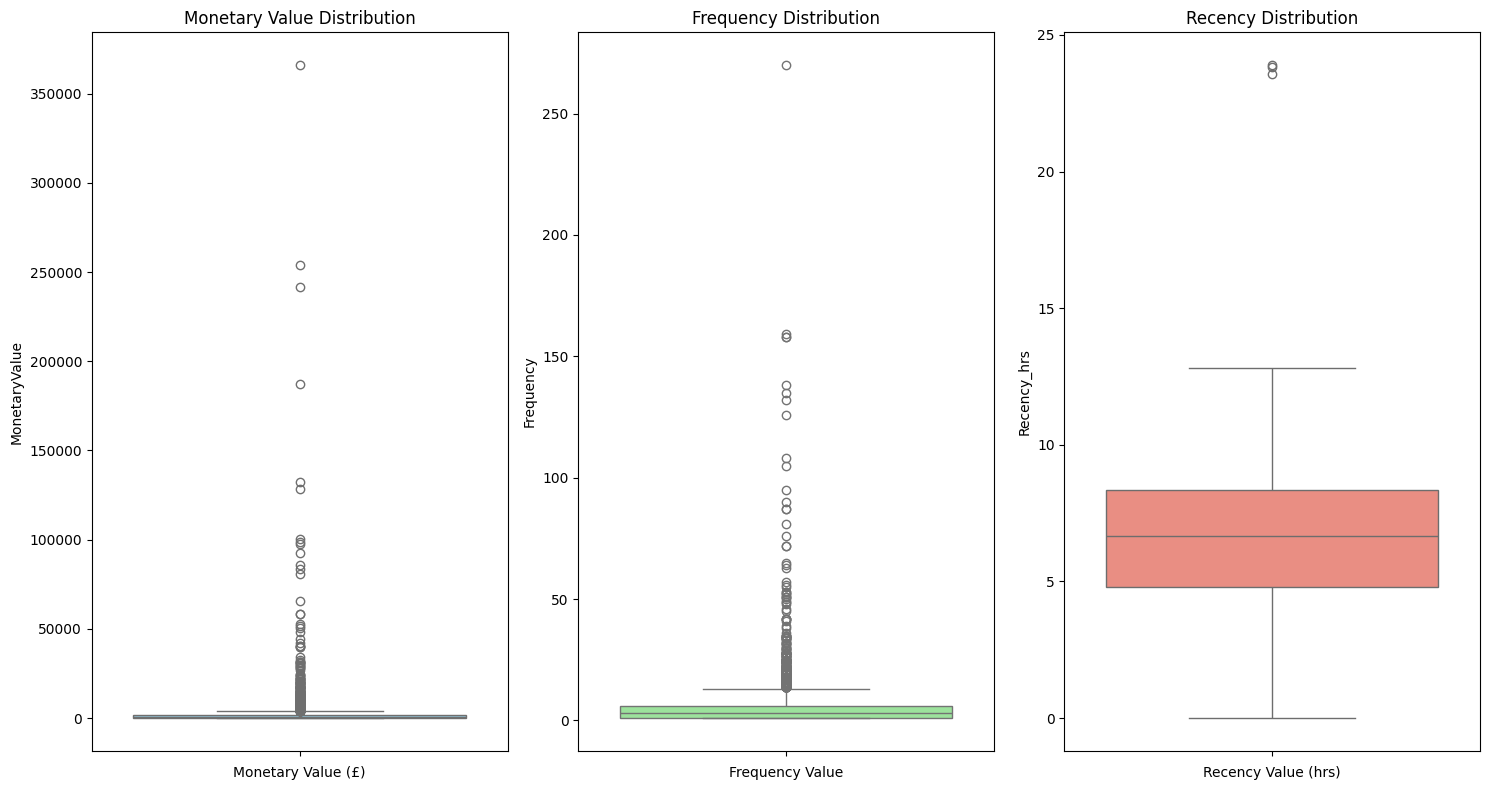

In [188]:
plt.figure(figsize=(15, 8))

plt.subplot(1,3,1)
sns.boxplot(data=agg_df['MonetaryValue'], color='skyblue')
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value (£)")

plt.subplot(1,3,2)
sns.boxplot(data=agg_df['Frequency'], color='lightgreen')
plt.title("Frequency Distribution")
plt.xlabel("Frequency Value")

plt.subplot(1,3,3)
sns.boxplot(data=agg_df['Recency_hrs'], color='salmon')
plt.title("Recency Distribution")
plt.xlabel("Recency Value (hrs)")

plt.tight_layout()
plt.show()

## Acquiring RFM outliers
Acquiring frames based on outliers of `Recency`, `Frequency` and `MonetaryValue` columns/fields.

### Recency outlier based frame

In [189]:
r_q1 = agg_df['Recency_hrs'].quantile(0.25)
r_q3 = agg_df['Recency_hrs'].quantile(0.75)
r_IQR = r_q3 - r_q1

r_ub = r_q3 + 1.5 * r_IQR
r_lb = r_q1 - 1.5 * r_IQR

recency_outliers_df = agg_df[(agg_df['Recency_hrs'] > r_ub) | (agg_df['Recency_hrs'] < r_lb)]
recency_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs
1665,14650.00,62.50,1,2010-04-29 20:27:00,23.57
3148,16646.00,693.80,2,2010-09-21 20:07:00,23.90
3550,17189.00,573.23,3,2010-05-27 20:11:00,23.83


### Frequency outliers based frame

In [190]:
f_q1 = agg_df['Frequency'].quantile(0.25)
f_q3 = agg_df['Frequency'].quantile(0.75)
f_IQR = f_q3 - f_q1

f_ub = f_q3 + 1.5 * f_IQR
f_lb = f_q1 - 1.5 * f_IQR

frequency_outliers_df = agg_df[(agg_df['Frequency'] > f_ub) | (agg_df['Frequency'] < f_lb)]
frequency_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs
0,12346.00,1860.86,15,2010-10-04 16:33:00,3.47
53,12417.00,3286.41,15,2010-11-03 13:15:00,6.77
57,12422.00,8806.04,18,2010-11-10 13:19:00,6.70
64,12431.00,4453.52,16,2010-12-01 10:03:00,9.97
68,12437.00,8109.39,28,2010-11-11 19:12:00,0.82
...,...,...,...,...,...
4332,18225.00,7845.94,19,2010-12-09 15:46:00,4.25
4333,18226.00,6805.63,24,2010-11-26 15:51:00,4.17
4337,18231.00,4860.50,24,2010-10-29 14:17:00,5.73
4346,18245.00,3783.32,15,2010-11-30 16:40:00,3.35


### Monetary outliers based frame

In [192]:
m_q1 = agg_df['MonetaryValue'].quantile(0.25)
m_q3 = agg_df['MonetaryValue'].quantile(0.75)
m_IQR = m_q3 - m_q1

m_ub = m_q3 + 1.5 * m_IQR
m_lb = m_q1 - 1.5 * m_IQR

monetary_outliers_df = agg_df[(agg_df['MonetaryValue'] > m_ub) | (agg_df['MonetaryValue'] < m_lb)]
monetary_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs
0,12346.00,1860.86,15,2010-10-04 16:33:00,3.47
1,12347.00,1323.32,2,2010-12-07 14:57:00,5.07
2,12348.00,222.16,1,2010-09-27 14:59:00,5.03
4,12351.00,300.93,1,2010-11-29 15:23:00,4.63
5,12352.00,343.80,2,2010-11-29 10:07:00,9.90
...,...,...,...,...,...
4376,18283.00,641.77,6,2010-11-22 15:30:00,4.52
4377,18284.00,561.68,2,2010-10-06 12:31:00,7.50
4378,18285.00,427.00,1,2010-02-17 10:24:00,9.62
4379,18286.00,1377.43,3,2010-08-20 11:57:00,8.07


## Non-outliers RFM dataframe

In [193]:
non_outliers_agg_df = agg_df[
    (~agg_df.index.isin(recency_outliers_df.index)) &
    (~agg_df.index.isin(frequency_outliers_df.index)) &
    (~agg_df.index.isin(monetary_outliers_df.index))
]

non_outliers_agg_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs
3,12349.00,2767.74,4,2010-10-28 08:23:00,11.63
8,12356.00,3562.25,3,2010-11-24 12:24:00,7.62
10,12358.00,2719.01,3,2010-11-29 10:56:00,9.08
11,12359.00,2599.72,8,2010-10-10 11:16:00,8.75
43,12406.00,3005.66,4,2010-11-16 11:55:00,8.10
...,...,...,...,...,...
4224,18064.00,3740.03,13,2010-09-19 15:37:00,4.40
4245,18094.00,3433.22,8,2010-09-19 14:03:00,5.97
4279,18145.00,2768.04,8,2010-11-22 12:55:00,7.10
4312,18194.00,3188.20,5,2010-09-27 13:08:00,6.88


### Verifying results

In [194]:
non_outliers_agg_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs
count,264.00,264.00,264.00,264,264.00
mean,15162.05,3175.72,7.70,2010-10-27 08:11:14.545454592,6.37
min,12349.00,2570.03,1.00,2010-03-19 12:35:00,0.68
25%,13761.25,2776.66,5.00,2010-10-12 16:39:15,4.74
50%,15016.50,3104.98,8.00,2010-11-11 15:14:00,6.32
75%,16565.00,3519.97,10.00,2010-11-27 00:13:30,8.07
max,18229.00,4063.62,13.00,2010-12-09 15:50:00,11.63
std,1691.03,449.38,3.12,NaN,2.39


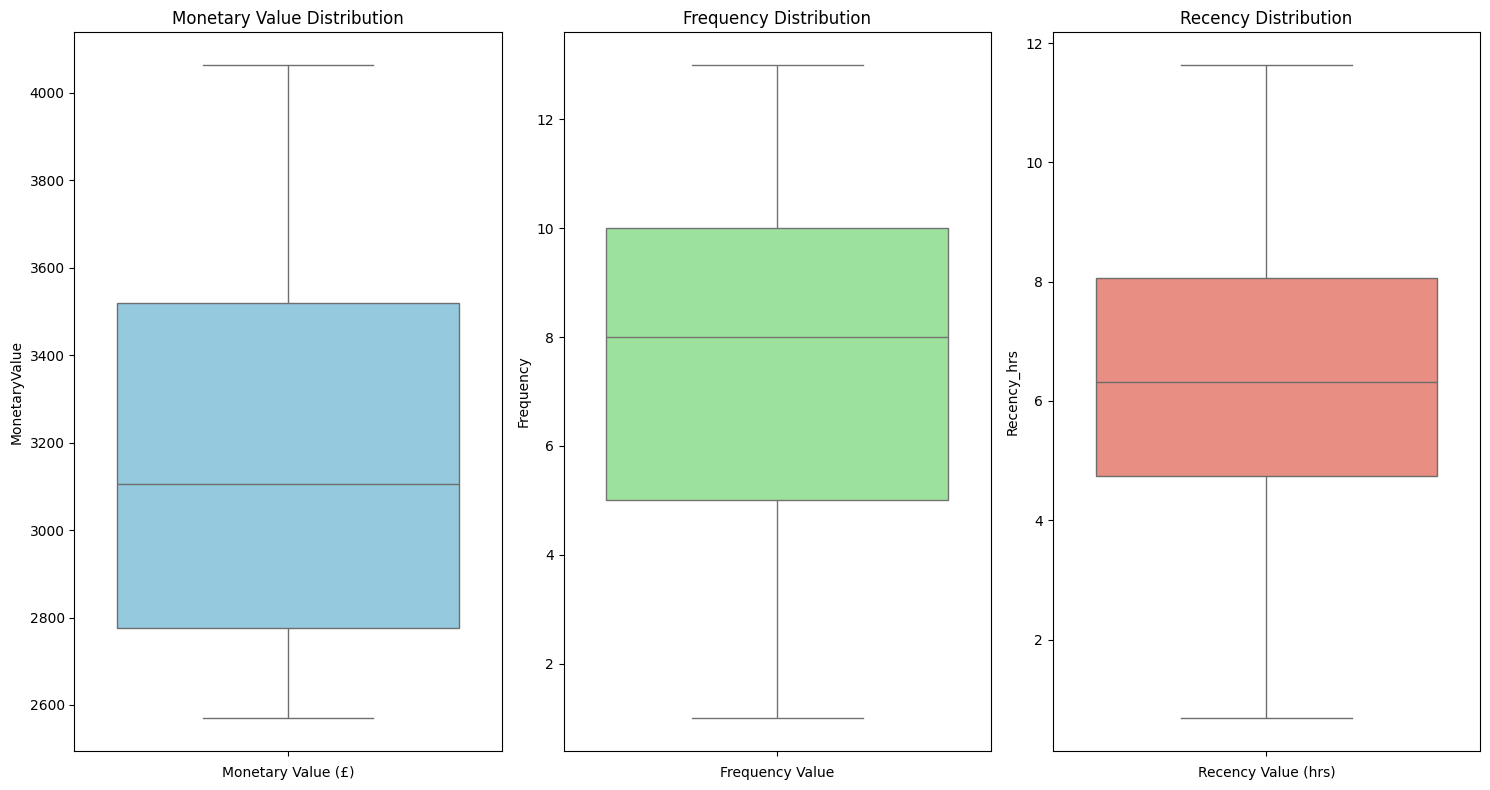

In [195]:
plt.figure(figsize=(15, 8))

plt.subplot(1,3,1)
sns.boxplot(data=non_outliers_agg_df['MonetaryValue'], color='skyblue')
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value (£)")

plt.subplot(1,3,2)
sns.boxplot(data=non_outliers_agg_df['Frequency'], color='lightgreen')
plt.title("Frequency Distribution")
plt.xlabel("Frequency Value")

plt.subplot(1,3,3)
sns.boxplot(data=non_outliers_agg_df['Recency_hrs'], color='salmon')
plt.title("Recency Distribution")
plt.xlabel("Recency Value (hrs)")

plt.tight_layout()
plt.show()

### Verifying outlier-free RFM distributions

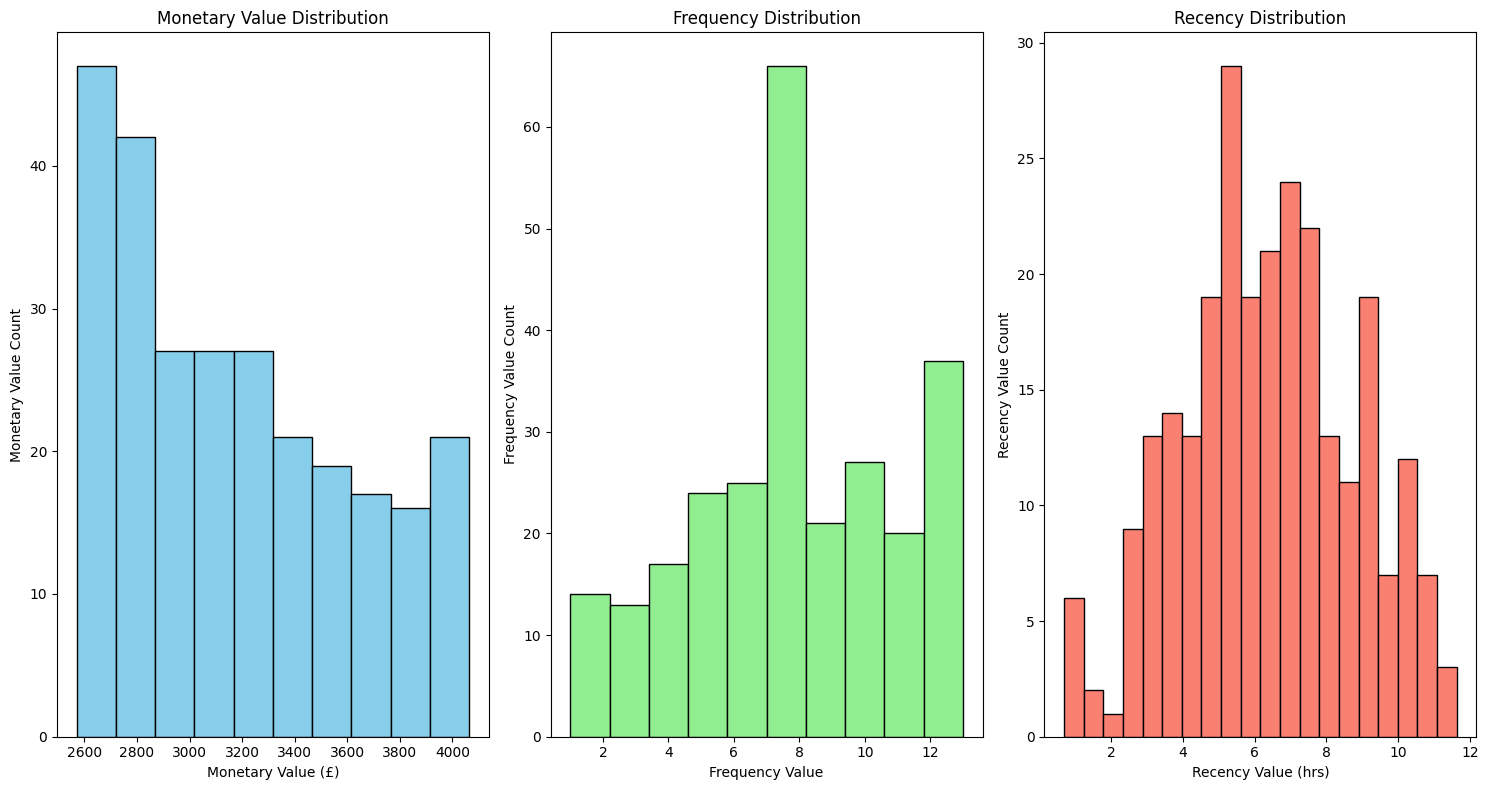

In [196]:
plt.figure(figsize=(15, 8))

plt.subplot(1,3,1)
plt.hist(non_outliers_agg_df['MonetaryValue'],bins=10, color='skyblue', edgecolor='black')
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value (£)")
plt.ylabel("Monetary Value Count")

plt.subplot(1,3,2)
plt.hist(non_outliers_agg_df['Frequency'],bins=10, color='lightgreen', edgecolor='black')
plt.title("Frequency Distribution")
plt.xlabel("Frequency Value")
plt.ylabel("Frequency Value Count")

plt.subplot(1,3,3)
plt.hist(non_outliers_agg_df['Recency_hrs'],bins=20, color='salmon', edgecolor='black')
plt.title("Recency Distribution")
plt.xlabel("Recency Value (hrs)")
plt.ylabel("Recency Value Count")

plt.tight_layout()
plt.show()

## 3D Visualizing RFM frame

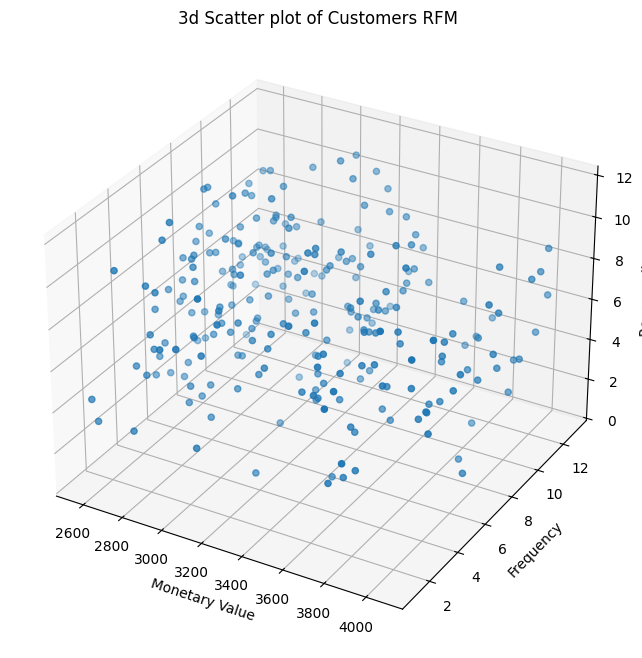

In [197]:
figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot(projection="3d")
ax.scatter(non_outliers_agg_df['MonetaryValue'], non_outliers_agg_df['Frequency'], non_outliers_agg_df['Recency_hrs'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency (hrs)')

ax.set_title('3d Scatter plot of Customers RFM')
plt.show()

## Standard scaling

In [198]:
standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(non_outliers_agg_df[['MonetaryValue', 'Frequency', 'Recency_hrs']])
scaled_data

array([[-9.09608961e-01, -1.19081776e+00,  2.20194404e+00],
       [ 8.61773587e-01, -1.51226550e+00,  5.20032691e-01],
       [-1.01825388e+00, -1.51226550e+00,  1.13417459e+00],
       [-1.28421431e+00,  9.49731954e-02,  9.94596888e-01],
       [-3.79159583e-01, -1.19081776e+00,  7.22420364e-01],
       [ 1.25180727e+00, -5.47922281e-01,  6.52631511e-01],
       [ 1.06000095e+00, -1.19081776e+00, -8.33871046e-01],
       [ 5.29217142e-01, -1.19081776e+00, -4.22116817e-01],
       [-2.10830194e-01, -2.26474543e-01, -2.27850029e+00],
       [-2.34507785e-01, -1.83371323e+00,  4.08370528e-01],
       [-5.28458173e-02, -1.83371323e+00,  1.12021682e+00],
       [ 1.02747213e+00, -2.26474543e-01, -1.52478069e+00],
       [ 1.17644921e+00, -2.26474543e-01,  1.62967545e+00],
       [ 9.16374735e-01,  9.49731954e-02,  1.69946430e+00],
       [-6.97513932e-01, -5.47922281e-01, -1.98792489e-01],
       [ 1.15546935e+00, -8.69370019e-01,  2.05982855e-01],
       [-2.87223209e-02,  1.05931641e+00

In [199]:
scaled_data_df = pd.DataFrame(data=scaled_data, index=non_outliers_agg_df.index, columns=['MonetaryValue', 'Frequency', 'Recency_hrs'])
scaled_data_df

,MonetaryValue,Frequency,Recency_hrs
3,-0.91,-1.19,2.20
8,0.86,-1.51,0.52
10,-1.02,-1.51,1.13
11,-1.28,0.09,0.99
43,-0.38,-1.19,0.72
...,...,...,...
4224,1.26,1.70,-0.83
4245,0.57,0.09,-0.17
4279,-0.91,0.09,0.30
4312,0.03,-0.87,0.21


### Visualizing scaled data shape

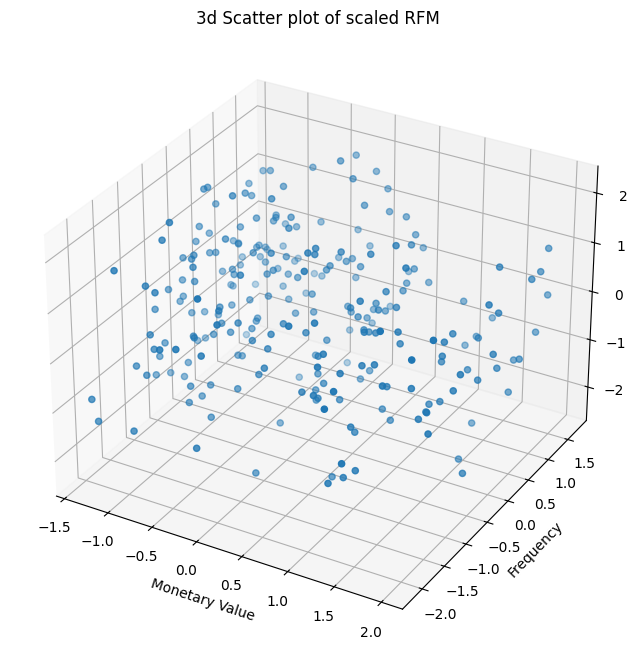

In [200]:
figure = plt.figure(figsize=(12,8))
ax = figure.add_subplot(projection="3d")
ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency_hrs'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency (hrs)')

ax.set_title('3d Scatter plot of scaled RFM')
plt.show()

# KMeans Clustering

### K-Means: Inertia
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

#### Tradeoff
A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

#### Inertia method
To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph.


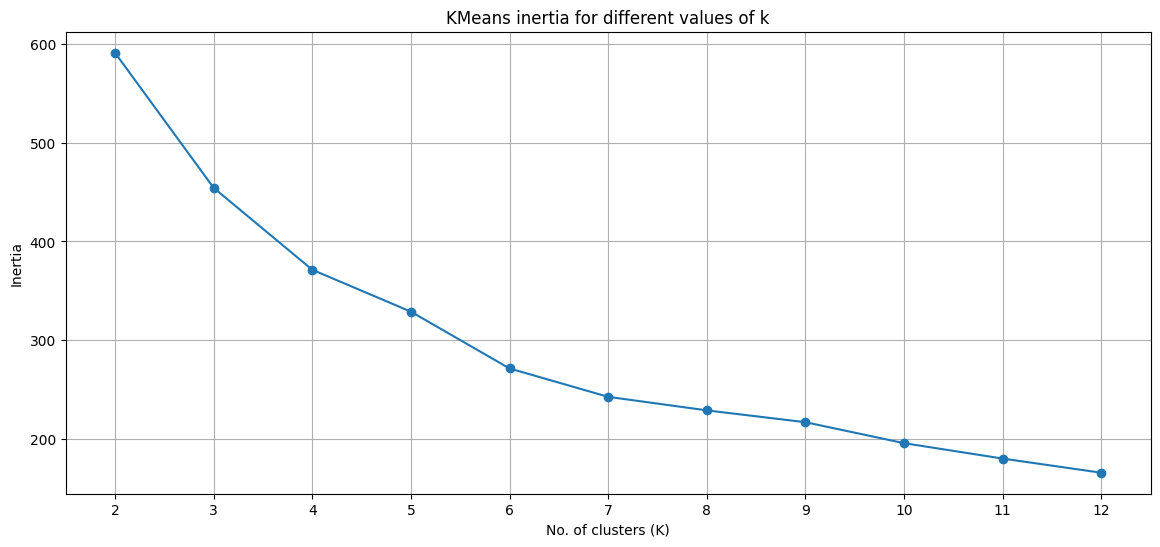

In [201]:
max_k = 12
k_values = range(2, max_k + 1)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit_predict(scaled_data_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans inertia for different values of k')
plt.xticks(k_values)
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia')

plt.grid(True)
plt.show()

## Silhouette score analysis

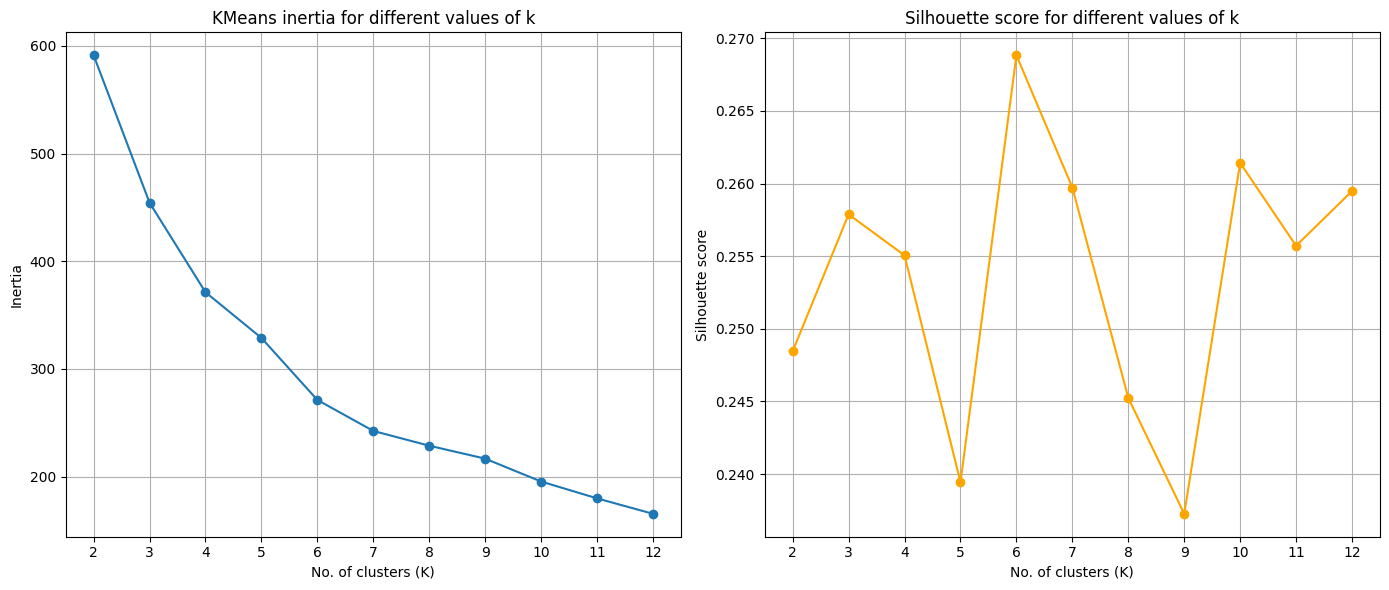

In [202]:
max_k = 12
k_values = range(2, max_k + 1)
silhouette_scores = []
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans inertia for different values of k')
plt.xticks(k_values)
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette score for different values of k')
plt.xticks(k_values)
plt.xlabel('No. of clusters (K)')
plt.ylabel('Silhouette score')
plt.grid(True)

plt.tight_layout()
plt.show()

## Getting cluster labels

In [203]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([2, 2, 2, 1, 2, 3, 3, 2, 0, 2, 2, 3, 1, 1, 2, 3, 1, 2, 0, 2, 3, 3,
       3, 2, 0, 2, 1, 0, 3, 0, 2, 3, 2, 1, 0, 3, 1, 0, 3, 0, 3, 2, 3, 0,
       2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 3, 1, 1, 2, 3, 3, 3, 3, 1, 3,
       2, 2, 3, 0, 0, 1, 1, 3, 2, 0, 0, 0, 1, 1, 0, 1, 1, 3, 2, 3, 0, 0,
       1, 2, 3, 1, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 1, 1, 0, 1, 1, 2, 2,
       0, 1, 3, 1, 1, 1, 3, 0, 1, 2, 3, 3, 0, 1, 0, 1, 2, 2, 3, 2, 3, 2,
       0, 3, 0, 1, 1, 1, 3, 2, 1, 0, 0, 3, 0, 3, 1, 2, 2, 3, 3, 0, 1, 3,
       2, 0, 0, 1, 3, 2, 1, 3, 2, 3, 1, 0, 3, 0, 2, 0, 0, 3, 3, 0, 1, 0,
       1, 0, 3, 1, 2, 1, 3, 3, 0, 0, 1, 0, 1, 2, 0, 0, 3, 0, 1, 1, 1, 3,
       0, 3, 0, 0, 2, 1, 0, 3, 0, 3, 0, 3, 2, 1, 1, 0, 0, 2, 1, 3, 1, 0,
       3, 0, 0, 3, 1, 1, 0, 0, 3, 0, 1, 0, 1, 0, 1, 2, 0, 1, 3, 0, 1, 0,
       2, 2, 0, 0, 0, 1, 1, 3, 3, 3, 0, 3, 3, 1, 0, 2, 0, 3, 3, 1, 2, 1],
      dtype=int32)

In [204]:
len(cluster_labels)

264

In [205]:
non_outliers_agg_df['Cluster'] = cluster_labels
non_outliers_agg_df

/var/folders/76/0nhsp7cs0r551sp4nmc7sh_00000gn/T/ipykernel_741/4091045915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_agg_df['Cluster'] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs,Cluster
3,12349.00,2767.74,4,2010-10-28 08:23:00,11.63,2
8,12356.00,3562.25,3,2010-11-24 12:24:00,7.62,2
10,12358.00,2719.01,3,2010-11-29 10:56:00,9.08,2
11,12359.00,2599.72,8,2010-10-10 11:16:00,8.75,1
43,12406.00,3005.66,4,2010-11-16 11:55:00,8.10,2
...,...,...,...,...,...,...
4224,18064.00,3740.03,13,2010-09-19 15:37:00,4.40,3
4245,18094.00,3433.22,8,2010-09-19 14:03:00,5.97,3
4279,18145.00,2768.04,8,2010-11-22 12:55:00,7.10,1
4312,18194.00,3188.20,5,2010-09-27 13:08:00,6.88,2


In [206]:
non_outliers_agg_df['Cluster'].value_counts()

Cluster
0    75
3    70
1    67
2    52
Name: count, dtype: int64

## Visualizing the clusters

### RFM clusters scatterdeness

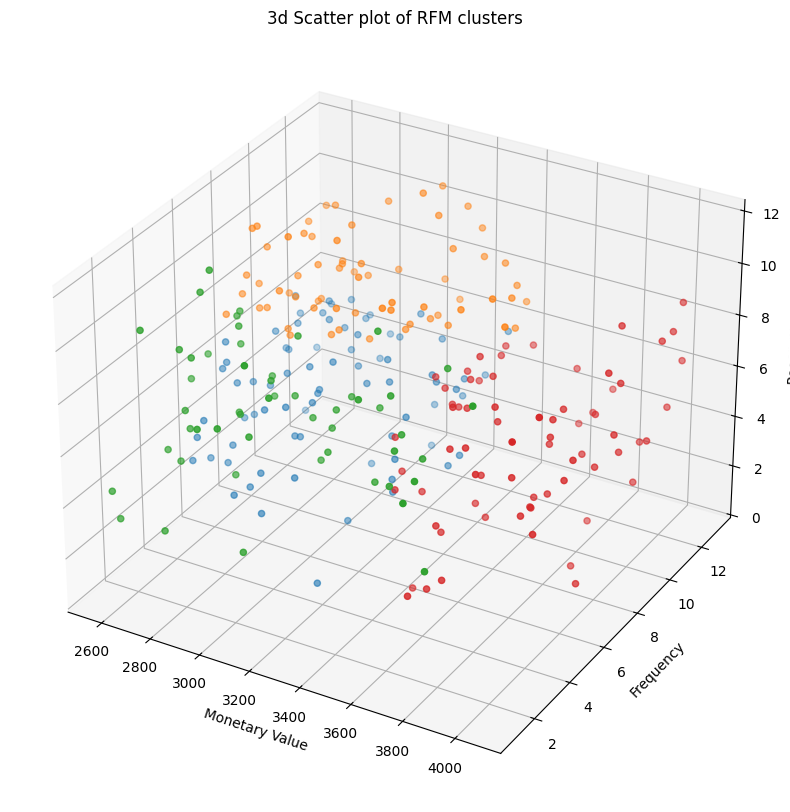

In [207]:
cluster_colors = {
    0: '#1f77b4', # blue
    1: '#ff7f0e', # orange
    2: '#2ca02c', # green
    3:'#d62728', # red
}

colors = non_outliers_agg_df['Cluster'].apply(lambda x : cluster_colors[x])

figure = plt.figure(figsize=(10,10))
ax = figure.add_subplot(projection="3d")
ax.scatter(non_outliers_agg_df['MonetaryValue'], non_outliers_agg_df['Frequency'], non_outliers_agg_df['Recency_hrs'], c=colors, marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3d Scatter plot of RFM clusters')
plt.show()

### RFM clusters density

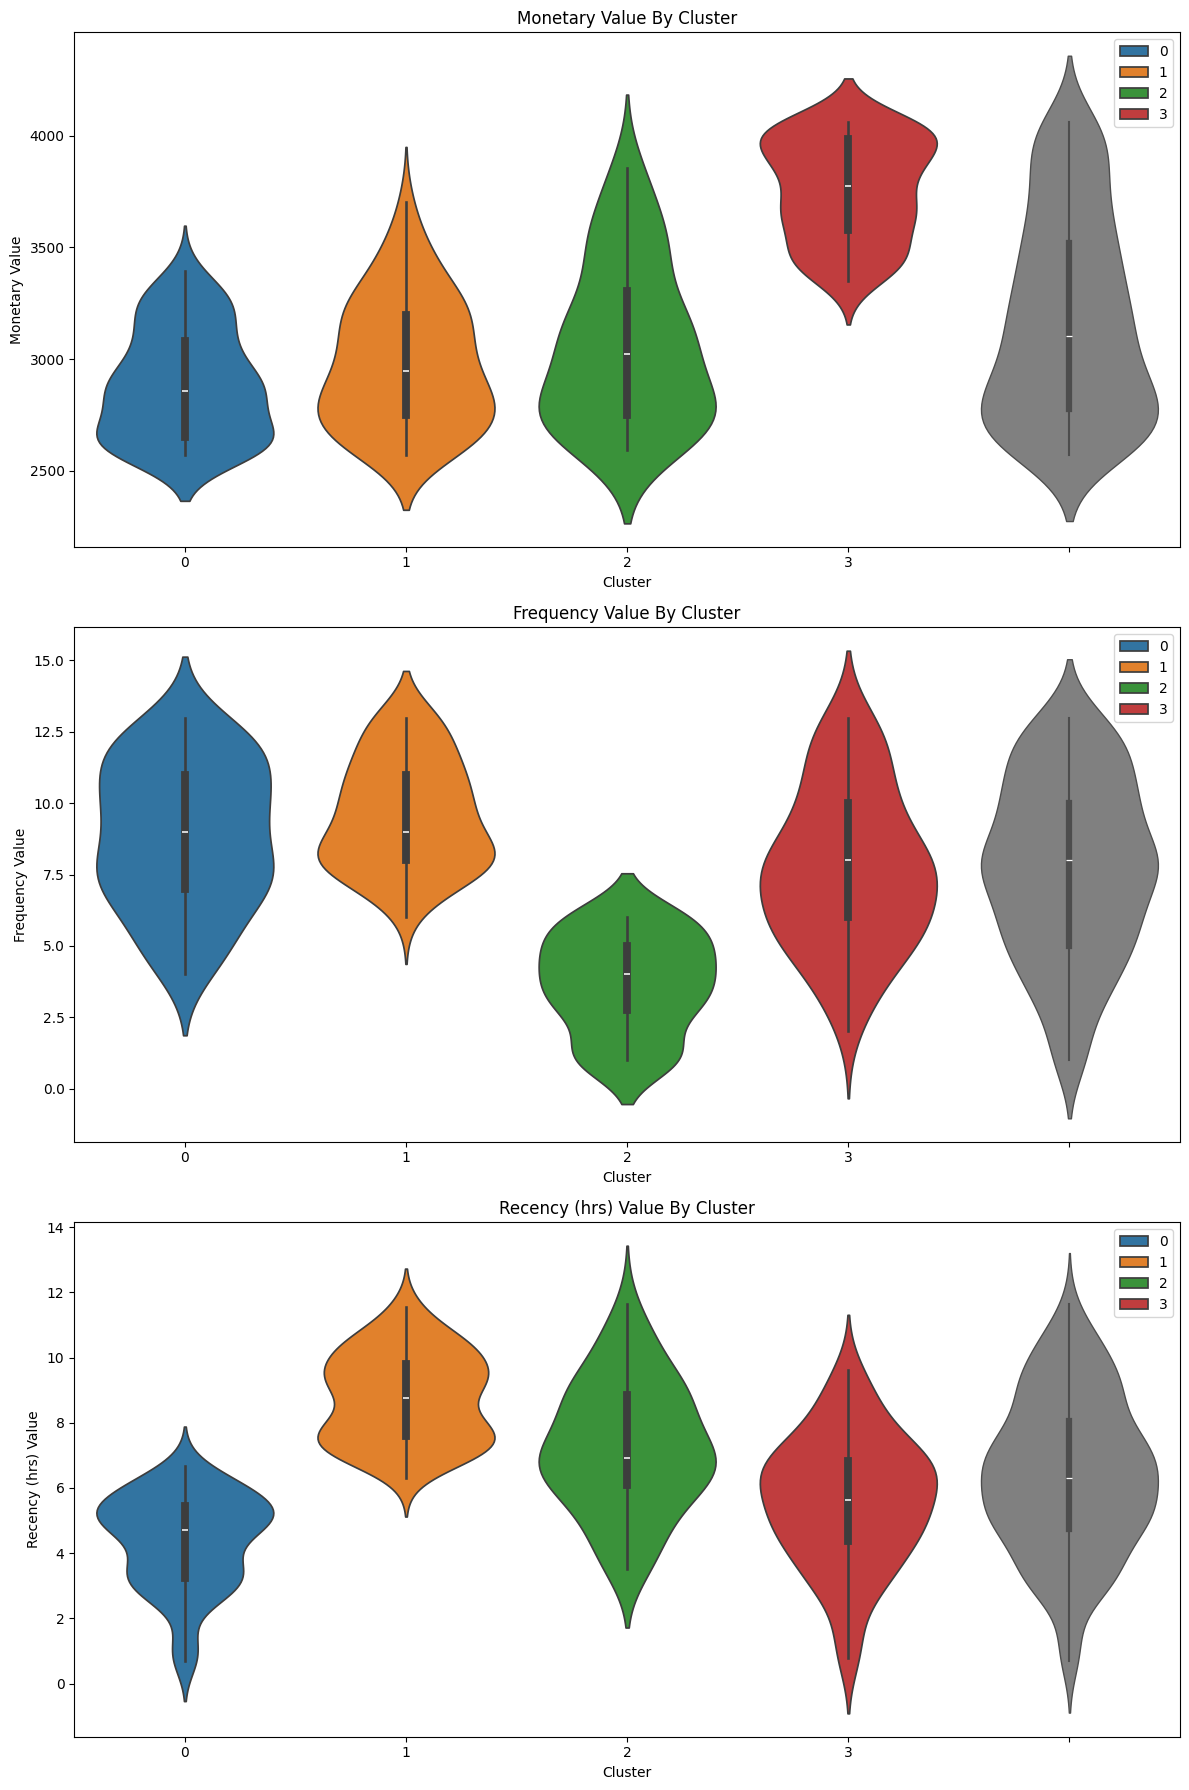

In [208]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(
    x=non_outliers_agg_df['Cluster'],
    y=non_outliers_agg_df['MonetaryValue'],
    palette=cluster_colors,
    hue=non_outliers_agg_df['Cluster']
)
sns.violinplot(y=non_outliers_agg_df['MonetaryValue'], color='gray',linewidth=1.0)
plt.title('Monetary Value By Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(
    x=non_outliers_agg_df['Cluster'],
    y=non_outliers_agg_df['Frequency'],
    palette=cluster_colors,
    hue=non_outliers_agg_df['Cluster']
)
sns.violinplot(y=non_outliers_agg_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency Value By Cluster')
plt.ylabel('Frequency Value')

plt.subplot(3,1,3)
sns.violinplot(
    x=non_outliers_agg_df['Cluster'],
    y=non_outliers_agg_df['Recency_hrs'],
    palette=cluster_colors,
    hue=non_outliers_agg_df['Cluster']
)
sns.violinplot(y=non_outliers_agg_df['Recency_hrs'], color='gray', linewidth=1.0)
plt.title('Recency (hrs) Value By Cluster')
plt.ylabel('Recency (hrs) Value')

plt.tight_layout()
plt.show()

### Cluster interpretation and labelling

#### interpretation

By analyzing the visualizations, the interpretation of the clusters remains as follows:

##### Cluster 0 (blue)
  - **Monetary Value**: Moderate spenders.
  - **Frequency**: High frequency of purchases.
  - **Recency**: Very recent purchases, indicating high engagement.

   **Interpretation**: **Loyal frequent shoppers** – actively purchasing with moderate spending.

##### Cluster 1 (orange)
  - **Monetary Value**: Similar to Cluster 0, moderate spenders.
  - **Frequency**: Slightly less frequent than Cluster 0.
  - **Recency**: A bit less recent than Cluster 0.

   **Interpretation**: **Steady periodic shoppers** – active but less frequent and not as recent as Cluster 0.

##### Cluster 2 (green)
  - **Monetary Value**: Lowest spending compared to other clusters.
  - **Frequency**: Low purchase frequency.
  - **Recency**: Purchases not as recent as Clusters 0 and 1.

   **Interpretation**: **Infrequent low-spenders** – occasional, low spenders who may need more engagement.

##### Cluster 3 (red)
  - **Monetary Value**: Highest spending group.
  - **Frequency**: Slightly lower frequency compared to Cluster 0.
  - **Recency**: Not the most recent buyers, but fairly engaged.

   **Interpretation**: **High-value frequent buyers** – big spenders who could be re-engaged to keep their loyalty.

#### Class/Category names
These class names should make it easier to interpret the behavior and value of each group when converting the clusters into classes for future classification tasks.

Based on the characteristics of each cluster, here are some potential class names:

##### Cluster 0 (blue): **"Loyal Frequent Shoppers"**
  - These customers shop frequently and are quite engaged with recent purchases.

##### Cluster 1 (orange): **"Steady Periodic Shoppers"**
  - These customers shop periodically with moderate spending, showing consistent, but less frequent engagement.

##### Cluster 2 (green): **"Occasional Low-Spenders"**
  - These customers shop infrequently with lower spending, indicating a need for re-engagement.

##### Cluster 3 (red): **"High-Value Buyers"**
  - These are the big spenders who shop less frequently than the loyal group but contribute significantly to revenue.

# Outlier analysis via clustering

## Finding overlapping indices

In [209]:
fm_overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
fm_overlap_indices

Index([   0,   57,   64,   68,   88,   89,   90,   92,   96,  114,
       ...
       4221, 4239, 4252, 4257, 4296, 4331, 4332, 4333, 4337, 4358],
      dtype='int64', length=268)

In [210]:
rf_overlap_indices = recency_outliers_df.index.intersection(frequency_outliers_df.index)
rf_overlap_indices

Index([], dtype='int64')

In [211]:
rm_overlap_indices = recency_outliers_df.index.intersection(frequency_outliers_df.index)
rm_overlap_indices

Index([], dtype='int64')

In [212]:
monetary_only_outliers = monetary_outliers_df.drop(fm_overlap_indices)
monetary_only_outliers

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs
1,12347.00,1323.32,2,2010-12-07 14:57:00,5.07
2,12348.00,222.16,1,2010-09-27 14:59:00,5.03
4,12351.00,300.93,1,2010-11-29 15:23:00,4.63
5,12352.00,343.80,2,2010-11-29 10:07:00,9.90
6,12353.00,317.76,1,2010-10-27 12:44:00,7.28
...,...,...,...,...,...
4376,18283.00,641.77,6,2010-11-22 15:30:00,4.52
4377,18284.00,561.68,2,2010-10-06 12:31:00,7.50
4378,18285.00,427.00,1,2010-02-17 10:24:00,9.62
4379,18286.00,1377.43,3,2010-08-20 11:57:00,8.07


In [112]:
frequency_only_outliers = frequency_outliers_df.drop(fm_overlap_indices)
frequency_only_outliers

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs
53,12417.00,3286.41,15,2010-11-03 13:15:00,6.77
97,12483.00,3013.24,14,2010-11-26 12:35:00,7.43
119,12523.00,2876.98,17,2010-11-30 12:31:00,7.50
162,12600.00,2701.60,16,2010-12-03 12:57:00,7.07
228,12708.00,2849.99,15,2010-12-06 10:43:00,9.30
...,...,...,...,...,...
4123,17931.00,3068.25,16,2010-11-07 12:36:00,7.42
4225,18065.00,3531.60,17,2010-11-16 10:05:00,9.93
4231,18075.00,3486.34,17,2010-11-30 12:09:00,7.87
4293,18168.00,2802.33,15,2010-12-02 18:08:00,1.88


In [213]:
monetary_frequency_outliers_df = monetary_outliers_df.loc[fm_overlap_indices]
monetary_frequency_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs
0,12346.00,1860.86,15,2010-10-04 16:33:00,3.47
57,12422.00,8806.04,18,2010-11-10 13:19:00,6.70
64,12431.00,4453.52,16,2010-12-01 10:03:00,9.97
68,12437.00,8109.39,28,2010-11-11 19:12:00,0.82
88,12471.00,21795.74,81,2010-12-02 10:37:00,9.40
...,...,...,...,...,...
4331,18223.00,8064.87,25,2010-11-19 14:57:00,5.07
4332,18225.00,7845.94,19,2010-12-09 15:46:00,4.25
4333,18226.00,6805.63,24,2010-11-26 15:51:00,4.17
4337,18231.00,4860.50,24,2010-10-29 14:17:00,5.73


## Cluster assigning to outliers dataframes

In [214]:
monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_frequency_outliers_df['Cluster'] = -3

outliers_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_frequency_outliers_df])
outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs,Cluster
1,12347.00,1323.32,2,2010-12-07 14:57:00,5.07,-1
2,12348.00,222.16,1,2010-09-27 14:59:00,5.03,-1
4,12351.00,300.93,1,2010-11-29 15:23:00,4.63,-1
5,12352.00,343.80,2,2010-11-29 10:07:00,9.90,-1
6,12353.00,317.76,1,2010-10-27 12:44:00,7.28,-1
...,...,...,...,...,...,...
4331,18223.00,8064.87,25,2010-11-19 14:57:00,5.07,-3
4332,18225.00,7845.94,19,2010-12-09 15:46:00,4.25,-3
4333,18226.00,6805.63,24,2010-11-26 15:51:00,4.17,-3
4337,18231.00,4860.50,24,2010-10-29 14:17:00,5.73,-3


In [215]:
outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4117 entries, 1 to 4358
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customer ID      4117 non-null   float64       
 1   MonetaryValue    4117 non-null   float64       
 2   Frequency        4117 non-null   int64         
 3   LastInvoiceDate  4117 non-null   datetime64[ns]
 4   Recency_hrs      4117 non-null   float64       
 5   Cluster          4117 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 225.1 KB


In [218]:
outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs,Cluster
count,4117.00,4117.00,4117.00,4117,4117.00,4117.00
mean,15363.13,2213.81,5.23,2010-09-07 05:47:50.512509184,6.59,-1.15
min,12346.00,2.95,1.00,2009-12-01 09:55:00,0.00,-3.00
25%,13890.00,298.30,1.00,2010-07-15 12:50:00,4.80,-1.00
50%,15371.00,644.53,3.00,2010-10-18 08:56:00,6.67,-1.00
75%,16845.00,1527.00,5.00,2010-11-22 13:22:00,8.35,-1.00
max,18287.00,366039.27,270.00,2010-12-09 20:01:00,23.90,-1.00
std,1701.13,10419.05,10.32,NaN,2.49,0.51


## Groups of outliers RFM clusters

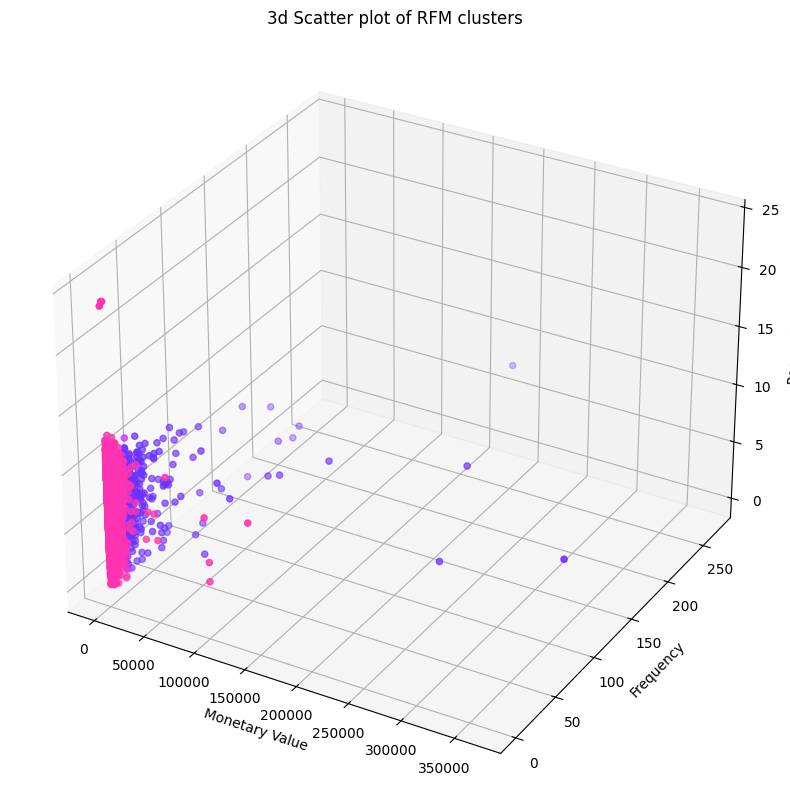

In [216]:
outliers_cluster_colors = {
    -1: '#ff33b1', # Vibrant Hot Pink
    -2: '#d033ff',  # Bright Purple (or Vivid Violet)
    -3: '#6d33ff' # Indigo or Electric Blue-Violet
}

colors = outliers_df['Cluster'].apply(lambda x : outliers_cluster_colors[x])

figure = plt.figure(figsize=(10,10))
ax = figure.add_subplot(projection="3d")
ax.scatter(outliers_df['MonetaryValue'], outliers_df['Frequency'], outliers_df['Recency_hrs'], c=colors, marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3d Scatter plot of RFM clusters')
plt.show()

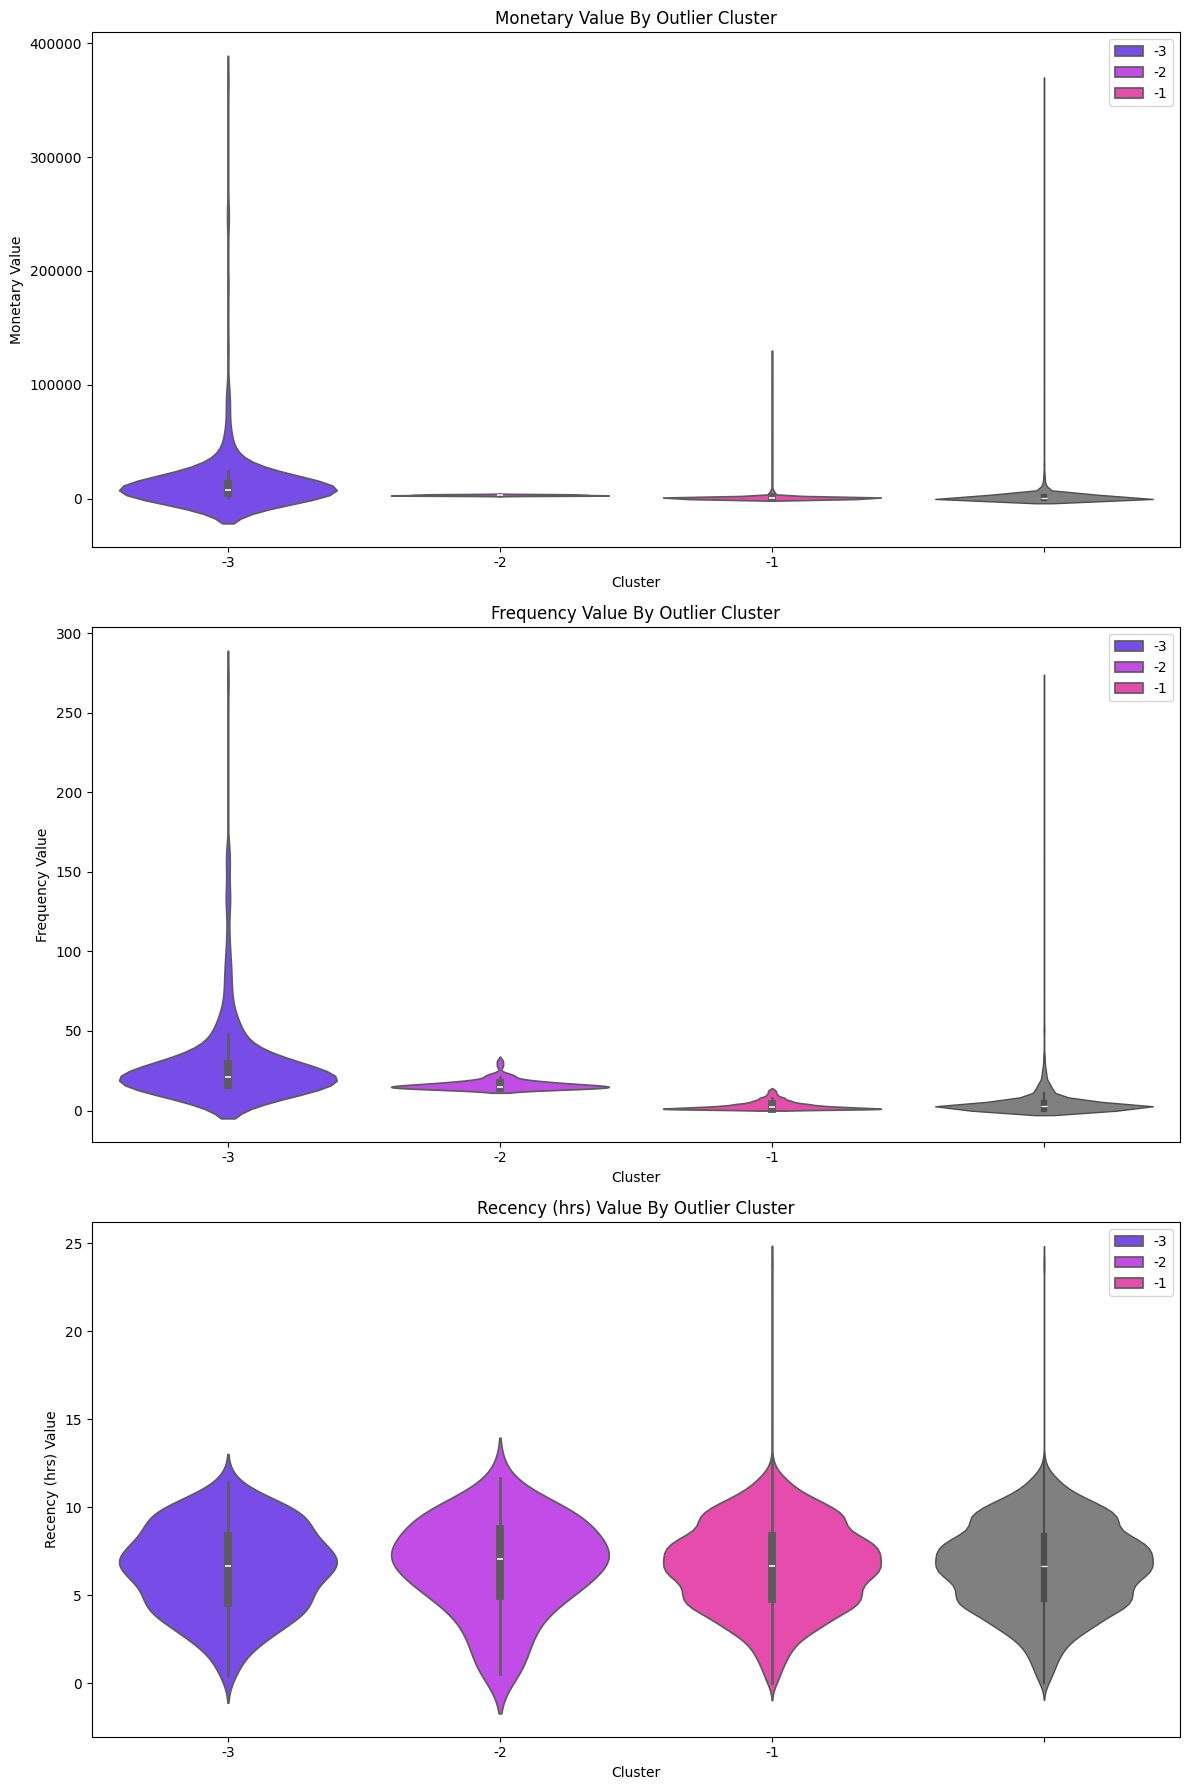

In [217]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(
    x=outliers_df['Cluster'],
    y=outliers_df['MonetaryValue'],
    palette=outliers_cluster_colors,
    hue=outliers_df['Cluster']
)
sns.violinplot(y=outliers_df['MonetaryValue'], color='gray',linewidth=1.0)
plt.title('Monetary Value By Outlier Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(
    x=outliers_df['Cluster'],
    y=outliers_df['Frequency'],
    palette=outliers_cluster_colors,
    hue=outliers_df['Cluster']
)
sns.violinplot(y=outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency Value By Outlier Cluster')
plt.ylabel('Frequency Value')

plt.subplot(3,1,3)
sns.violinplot(
    x=outliers_df['Cluster'],
    y=outliers_df['Recency_hrs'],
    palette=outliers_cluster_colors,
    hue=outliers_df['Cluster']
)
sns.violinplot(y=outliers_df['Recency_hrs'], color='gray', linewidth=1.0)
plt.title('Recency (hrs) Value By Outlier Cluster')
plt.ylabel('Recency (hrs) Value')

plt.tight_layout()
plt.show()

## Outliers' clusters interpretation and labelling

### Interpretation
#### Cluster -3: (Indigo)
 - Extremely dense `recency` (in hrs) between the interval of 0 to 13.
 - High amount of customers within the `frequency`'s interval of 0 to 50, the customers' `frequency`'s occurrence from 170 (not sure of the exact number)becomes low, and after that just few customers had `frequency` > 200.
 - High occurrence of customers with the `monetary values` > 0, there're few customers with monetary values > 100000.

**Interpretation**: *High frequent, less-recent, high spenders.*

#### Cluster -2 (Purple)
 - Customers' occurrences spikes at `recency` up-to 15 hrs.
 - Most occurrences of customers around the median of the `frequency`.
 - Most customer occurrences are within the median of `monetary value` values.

**Interpretation**: *Low-frequent, highly recent, low spenders.*

#### Cluster -1 (Pink)
 - Customers' occurrence spikes at `recency` up-to 13 hrs.
 - High occurrences of customer in interval of 1 >= `frequency` < 50; with few exceptions, not exceeding or reaching 100000.
 - Customer occurrences is concentrated at the `monetary value`'s median, not exceeding it.

**Interpretation**: *Extremely-frequent, highly recent, low spenders.*

Based on your interpretations of the clusters, here are some suggested class/category names for each cluster that encapsulate their characteristics:

### Labelling

#### Cluster -3: (Indigo)
   - **Name**: **"High-Frequency Big Spenders"**
   - **Rationale**: This name reflects their high frequency of transactions, recent purchase behavior, and significant monetary values.

#### Cluster -2 (Purple)
   - **Name**: **"Recent Low-Spenders"**
   - **Rationale**: This captures the essence of customers who make frequent recent purchases but generally spend less.

#### Cluster -1 (Pink)
   - **Name**: **"Frequent Bargain Hunters"**
   - **Rationale**: This emphasizes their high frequency of transactions and recent purchase activity, combined with a tendency to spend less.

### Summary
- **High-Frequency Big Spenders**: Cluster -3
- **Recent Low-Spenders**: Cluster -2
- **Frequent Bargain Hunters**: Cluster -1

## Combining the outlier and non-outlier aggregate dataframe

In [250]:
full_agg_df = pd.concat([non_outliers_agg_df, outliers_df])
full_agg_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs,Cluster
3,12349.00,2767.74,4,2010-10-28 08:23:00,11.63,2
8,12356.00,3562.25,3,2010-11-24 12:24:00,7.62,2
10,12358.00,2719.01,3,2010-11-29 10:56:00,9.08,2
11,12359.00,2599.72,8,2010-10-10 11:16:00,8.75,1
43,12406.00,3005.66,4,2010-11-16 11:55:00,8.10,2
...,...,...,...,...,...,...
4331,18223.00,8064.87,25,2010-11-19 14:57:00,5.07,-3
4332,18225.00,7845.94,19,2010-12-09 15:46:00,4.25,-3
4333,18226.00,6805.63,24,2010-11-26 15:51:00,4.17,-3
4337,18231.00,4860.50,24,2010-10-29 14:17:00,5.73,-3


### Creating the cluster based respective label

In [253]:
category_names = {
    -3: 'Big Spenders',
    -2: 'New Low-Spenders',
    -1: 'Frequent Bargainers',
    0: 'Loyal frequent shopper',
    1: 'Steady Periodic Shoppers',
    2: 'Occasional Low-Spenders',
    3: 'High-Value Buyers'
}

full_agg_df['ClusterLabel'] = full_agg_df['Cluster'].map(category_names)
full_agg_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs,Cluster,ClusterLabel
3,12349.00,2767.74,4,2010-10-28 08:23:00,11.63,2,Occasional Low-Spenders
8,12356.00,3562.25,3,2010-11-24 12:24:00,7.62,2,Occasional Low-Spenders
10,12358.00,2719.01,3,2010-11-29 10:56:00,9.08,2,Occasional Low-Spenders
11,12359.00,2599.72,8,2010-10-10 11:16:00,8.75,1,Steady Periodic Shoppers
43,12406.00,3005.66,4,2010-11-16 11:55:00,8.10,2,Occasional Low-Spenders
...,...,...,...,...,...,...,...
4331,18223.00,8064.87,25,2010-11-19 14:57:00,5.07,-3,Big Spenders
4332,18225.00,7845.94,19,2010-12-09 15:46:00,4.25,-3,Big Spenders
4333,18226.00,6805.63,24,2010-11-26 15:51:00,4.17,-3,Big Spenders
4337,18231.00,4860.50,24,2010-10-29 14:17:00,5.73,-3,Big Spenders


### Creating the full aggregated dataframe distribution plot

In [273]:
full_agg_df['MonetaryValue_per_100_pounds'] = full_agg_df['MonetaryValue']/100.00
full_agg_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency_hrs,Cluster,ClusterLabel,MonetaryValue_per_100_pounds
3,12349.00,2767.74,4,2010-10-28 08:23:00,11.63,2,Occasional Low-Spenders,27.68
8,12356.00,3562.25,3,2010-11-24 12:24:00,7.62,2,Occasional Low-Spenders,35.62
10,12358.00,2719.01,3,2010-11-29 10:56:00,9.08,2,Occasional Low-Spenders,27.19
11,12359.00,2599.72,8,2010-10-10 11:16:00,8.75,1,Steady Periodic Shoppers,26.00
43,12406.00,3005.66,4,2010-11-16 11:55:00,8.10,2,Occasional Low-Spenders,30.06
...,...,...,...,...,...,...,...,...
4331,18223.00,8064.87,25,2010-11-19 14:57:00,5.07,-3,Big Spenders,80.65
4332,18225.00,7845.94,19,2010-12-09 15:46:00,4.25,-3,Big Spenders,78.46
4333,18226.00,6805.63,24,2010-11-26 15:51:00,4.17,-3,Big Spenders,68.06
4337,18231.00,4860.50,24,2010-10-29 14:17:00,5.73,-3,Big Spenders,48.60


/var/folders/76/0nhsp7cs0r551sp4nmc7sh_00000gn/T/ipykernel_741/1838524593.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cluster_counts.keys(), rotation=45, ha='right')  # Rotate x-axis labels


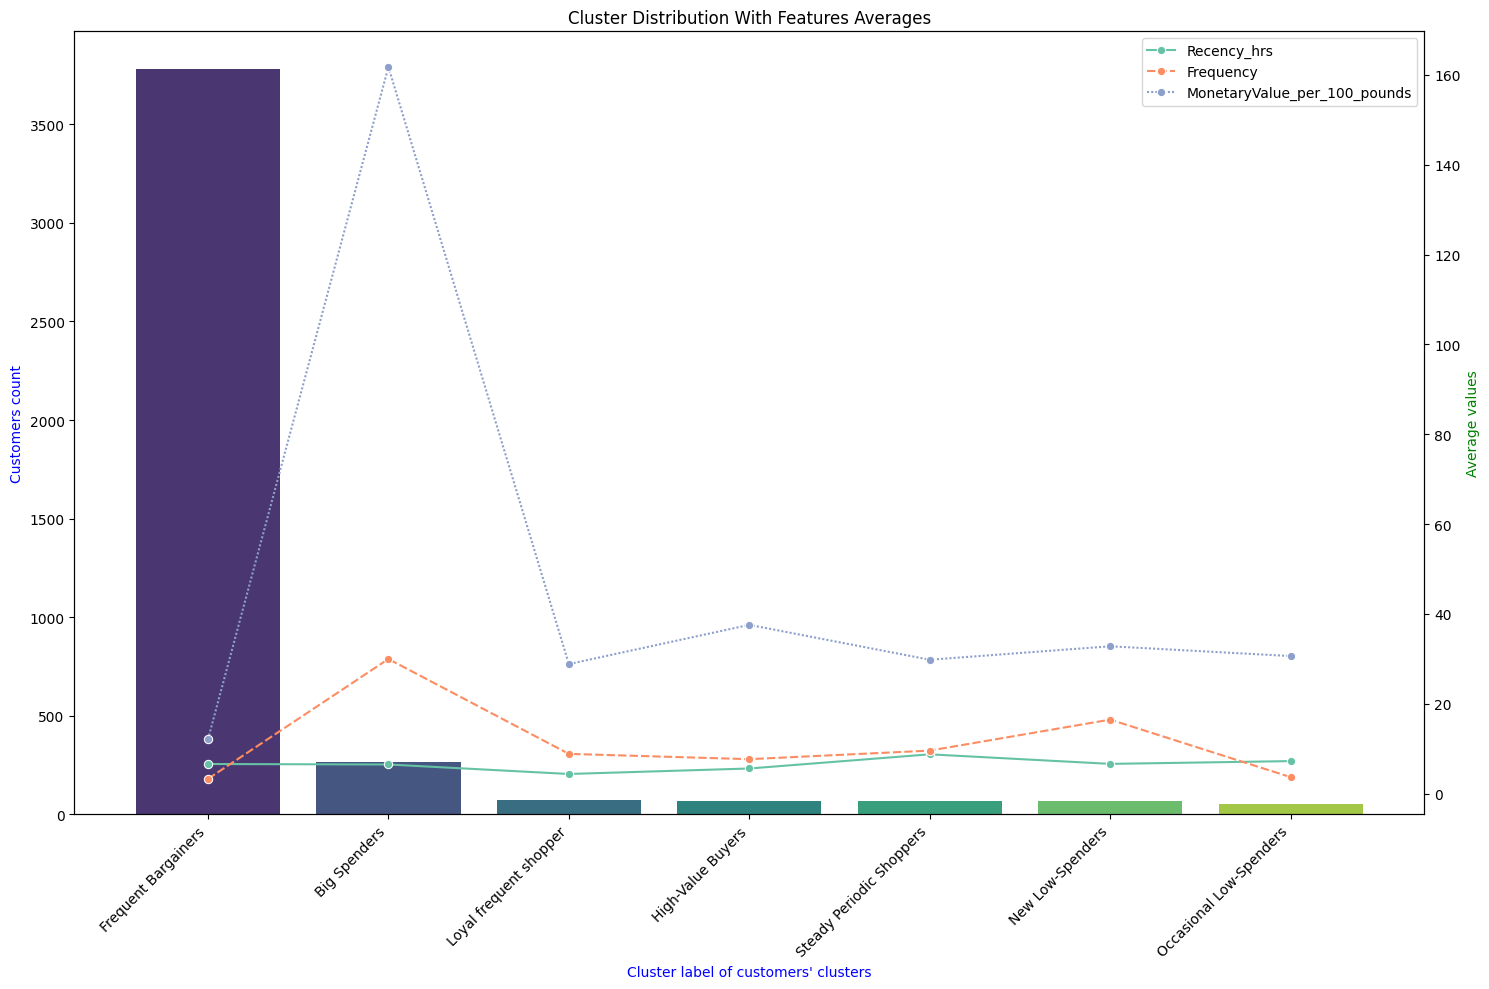

In [275]:
cluster_counts = full_agg_df['ClusterLabel'].value_counts()
feature_means = full_agg_df.groupby(by='ClusterLabel')[['Recency_hrs', 'Frequency', 'MonetaryValue_per_100_pounds']].mean()

fig, ax1 = plt.subplots(figsize=(15, 10))
sns.barplot(x=cluster_counts.keys(), y=cluster_counts.values, palette='viridis', hue=cluster_counts.index)
ax1.set_title('Cluster Distribution With Features Averages')
ax1.set_xlabel("Cluster label of customers' clusters", color='b')
ax1.set_ylabel("Customers count", color='b')
ax1.set_xticklabels(cluster_counts.keys(), rotation=45, ha='right')

ax2 = ax1.twinx()
sns.lineplot(data=feature_means, ax=ax2, marker='o', palette='Set2')
ax2.set_ylabel('Average values', color='g')

plt.tight_layout()
plt.show()

| By            | M. Fawad Awan                                         |
|---------------|-------------------------------------------------------|
| LinkedIn      | [Fawad Awan](https://www.linkedin.com/in/fawad-awan-893a58171/) |
| GitHub        | [JackTheProgrammer](https://github.com/JackTheProgrammer) |